In [ ]:
import sys
print("Python: {}".format(sys.version))

import pandas as pd
print("Pandas: {}".format(pandas.__version__))

import numpy
print("Numpy: {}".format(numpy.__version__))
import scipy
print("Scipi: {}".format(scipy.__version__))

import sklearn
print("Sklearn: {}".format(sklearn.__version__))

import matplotlib
print("Matplotlib: {}".format(matplotlib.__version__))

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Pandas: 1.1.5
Numpy: 1.19.5
Scipi: 1.4.1
Sklearn: 1.0.1
Matplotlib: 3.2.2


In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier

In [ ]:
#loading dataset
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [ ]:
#dimensions of the dataset
print(data.shape)

(150, 6)


In [ ]:

#printing first five rows of data
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
#statistical summary
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
#class distribution
print(data.groupby("Species").size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


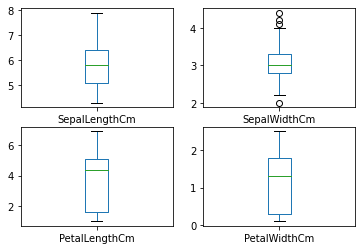

In [ ]:

datas = data.iloc[:,1:]
#datas.shape

#univariate plots - box and whisker plots
datas.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

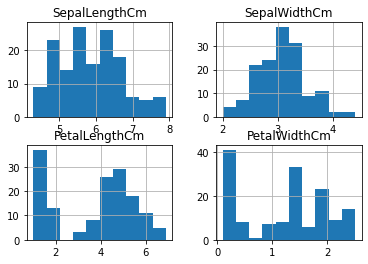

In [ ]:
#histogram
datas.hist()
pyplot.show()

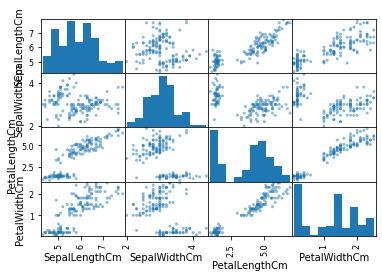

In [ ]:
#multivariate analysis
scatter_matrix(datas)
pyplot.show()

In [ ]:
arr = datas.values
x = arr[:,0:4]
y = arr[:,4]

x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#LogisticRegresssion
#LinearDiscriminantAnalysis
#K-Nearest nighbors
#Classification and regression trees
#Gaussian Naive Bayes
#SVM

#Building models


model = []
model.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
model.append(('LDA', LinearDiscriminantAnalysis()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('NB', GaussianNB()))
model.append(('SVM', SVC(gamma='auto')))

In [ ]:
#evaluating the created models
result = []
names = []
for name,models in model:
    kfold = StratifiedKFold(n_splits=10,random_state=None)
    cv_results = cross_val_score(models, x_train, y_train, cv=kfold, scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


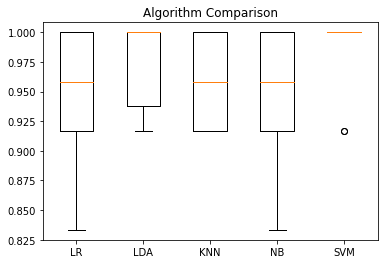

In [ ]:
#comparing models
pyplot.boxplot(result,labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
#making predictions on SVM
model = SVC(gamma='auto')
model.fit(x_train,y_train)
pred = model.predict(x_validation)

In [ ]:
#evaluating predictions
print(accuracy_score(y_validation, pred))
print(confusion_matrix(y_validation,pred))
print(classification_report(y_validation,pred))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

